In [44]:
#Source: https://www.datasciencecentral.com/profiles/blogs/python-implementing-a-k-means-algorithm-with-sklearn
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

new_data = pd.read_csv("global_landslides.csv")
#new_data = pd.read_csv("modified_dataset.csv")

In [45]:
df = pd.DataFrame(new_data)
df = df[["fatalities", "landslide_size", "latitude", "longitude"]]

In [46]:
geolocation = df[["latitude", "longitude"]] # Making 2D-array for KMeans
geolocation.shape

(9564, 2)

In [47]:
Y = geolocation[['longitude']]
X = geolocation[['latitude']]

In [48]:
Nc = range(1,20)
kmeans = [KMeans(n_clusters=i) for i in Nc]

In [49]:
score = [kmeans[i].fit(Y).score(Y) for i in range(len(kmeans))]

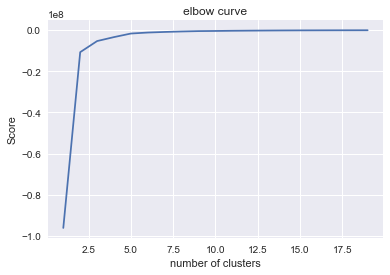

In [50]:
plt.plot(Nc, score)
plt.xlabel("number of clusters")
plt.ylabel("Score")
plt.title("elbow curve")
plt.show()

In [51]:
pca = PCA(n_components=1).fit(Y)
pca_d = pca.transform(Y)
pca_c = pca.transform(X)

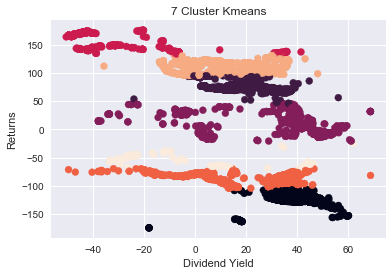

In [54]:
kmeans = KMeans(n_clusters=7)
kmeansoutput = kmeans.fit(Y)
plt.figure("7 Cluster KMeans")
plt.scatter(pca_c[:, 0 ], pca_d[:, 0], c=kmeansoutput.labels_)
plt.xlabel('Dividend Yield')
plt.ylabel("Returns")
plt.title("7 Cluster Kmeans")
plt.show()